In [1]:
import warnings
warnings.filterwarnings('ignore')
# For ignoring warnings printed by R magic commands

In [2]:
import os
import glob

In [3]:
# Import pandas
import pandas as pd

In [4]:
# Load R magic
%load_ext rpy2.ipython
# Import ggplot2
%R require(ggplot2);

In [5]:
# If experiment parameters change, modify this function
def AddParametersAsColumns(df, folder):
    expParams = folder.split('/')[-1].split('.')
    
    cloudParams = expParams[1].split('_')
    df['groupSizeDist'] = cloudParams[10]
    df['placementDist'] = cloudParams[11]
    df['placementNumHostsPerLeaf'] = 'uniform' if cloudParams[12] == '-1' else cloudParams[12]
    df['seed'] = int(cloudParams[15])
    
    optimizerParams_0 = expParams[2].split('_')
    node_type_0 = optimizerParams_0[7]
    df['%sAlgorithm' % node_type_0] = optimizerParams_0[0]
    df['%sNumBitmaps' % node_type_0] = int(optimizerParams_0[1])
    df['%sNumNodesPerBitmap' % node_type_0] = int(optimizerParams_0[2])
    df['%sRedundancyPerBitmap' % node_type_0] = int(optimizerParams_0[3])
    df['%sNumRules' % node_type_0] = int(optimizerParams_0[4])
    
    if len(expParams) > 3:
        optimizerParams_1 = expParams[3].split('_')
        node_type_1 = optimizerParams_1[7]
        df['%sAlgorithm' % node_type_1] = optimizerParams_1[0]
        df['%sNumBitmaps' % node_type_1] = int(optimizerParams_1[1])
        df['%sNumNodesPerBitmap' % node_type_1] = int(optimizerParams_1[2])
        df['%sRedundancyPerBitmap' % node_type_1] = int(optimizerParams_1[3])
        df['%sNumRules' % node_type_1] = int(optimizerParams_1[4])
    
# Turns all files of a given filname across a set of folders into a single dataframe
def DataSetAsDataFrame(filename, folders, headers, header=None):
    # Read dataset as dataframe
    def ReadDataSet(folder):
        df = pd.read_csv(folder + '/' + filename, sep=',', header=header, names=headers)
        AddParametersAsColumns(df, folder)
        return df
    # Get the list of dataframes
    dfs = map(ReadDataSet, folders)
    # Combine into a single dataframe
    df = pd.concat(dfs)
    return df

In [6]:
%%R 
plotTheme <- theme(legend.title=element_blank(), legend.position="top", legend.text=element_text(size=6))

In [7]:
directory = '/mnt/sdb1/baseerat/numerical-evals/12-11-2017/logs-1M/'
folders = glob.glob(directory + "logs*_0.*")

In [8]:
vmCountPerTenant = DataSetAsDataFrame('vm_count_per_tenant.csv', 
                                      folders, 
                                      ['vmCount'])

In [9]:
vmCountPerTenant.head(2)

,vmCount,groupSizeDist,placementDist,placementNumHostsPerLeaf,seed,podsAlgorithm,podsNumBitmaps,podsNumNodesPerBitmap,podsRedundancyPerBitmap,podsNumRules
0,184,uniform,colocate-uniform,uniform,0,exact-match,1,3,0,10000
1,46,uniform,colocate-uniform,uniform,0,exact-match,1,3,0,10000


In [10]:
# vmCountPerTenant[
#     (vmCountPerTenant['groupSizeDist'] == 'wve') & 
#     (vmCountPerTenant['placementDist'] == 'colocate-uniform') & 
#     (vmCountPerTenant['placementNumHostsPerLeaf'] == 'uniform') & 
#     (vmCountPerTenant['podsAlgorithm'] == 'exact-match') & 
#     (vmCountPerTenant['podsNumBitmaps'] == 1) & 
#     (vmCountPerTenant['podsNumNodesPerBitmap'] == 3) &
#     (vmCountPerTenant['podsRedundancyPerBitmap'] == 0) &
#     (vmCountPerTenant['podsNumRules'] == 10000)
# ]['vmCount'].quantile([0.0, 0.5, 0.99, 0.999, 0.9999, 1.0])
vmCountPerTenant[
    (vmCountPerTenant['groupSizeDist'] == 'wve') & 
    (vmCountPerTenant['placementDist'] == 'colocate-uniform') & 
    (vmCountPerTenant['placementNumHostsPerLeaf'] == 'uniform') & 
    (vmCountPerTenant['podsAlgorithm'] == 'exact-match') & 
    (vmCountPerTenant['podsNumBitmaps'] == 1) & 
    (vmCountPerTenant['podsNumNodesPerBitmap'] == 3) &
    (vmCountPerTenant['podsRedundancyPerBitmap'] == 0) &
    (vmCountPerTenant['podsNumRules'] == 10000)
]['vmCount'].describe()

count    3000.000000
mean      179.701000
std       432.859193
min        10.000000
25%        46.000000
50%        97.000000
75%       182.000000
max      4999.000000
Name: vmCount, dtype: float64

In [12]:
groupCountPerTenant = DataSetAsDataFrame('group_count_per_tenant.csv', 
                                         folders, ['groupCount'])

In [14]:
# groupCountPerTenant[
#     (groupCountPerTenant['groupSizeDist'] == 'wve') & 
#     (groupCountPerTenant['placementDist'] == 'colocate-uniform') & 
#     (groupCountPerTenant['placementNumHostsPerLeaf'] == 'uniform') & 
#     (groupCountPerTenant['podsAlgorithm'] == 'exact-match') & 
#     (groupCountPerTenant['podsNumBitmaps'] == 1) & 
#     (groupCountPerTenant['podsNumNodesPerBitmap'] == 3) &
#     (groupCountPerTenant['podsRedundancyPerBitmap'] == 0) &
#     (groupCountPerTenant['podsNumRules'] == 10000)
# ]['groupCount'].quantile([0.0, 0.5, 0.99, 0.999, 0.9999, 1.0])
groupCountPerTenant[
    (groupCountPerTenant['groupSizeDist'] == 'wve') & 
    (groupCountPerTenant['placementDist'] == 'colocate-uniform') & 
    (groupCountPerTenant['placementNumHostsPerLeaf'] == 'uniform') & 
    (groupCountPerTenant['podsAlgorithm'] == 'exact-match') & 
    (groupCountPerTenant['podsNumBitmaps'] == 1) & 
    (groupCountPerTenant['podsNumNodesPerBitmap'] == 3) &
    (groupCountPerTenant['podsRedundancyPerBitmap'] == 0) &
    (groupCountPerTenant['podsNumRules'] == 10000)
]['groupCount'].describe()

count    3000.000000
mean      332.833333
std       802.921490
min        18.000000
25%        85.000000
50%       179.000000
75%       337.000000
max      9272.000000
Name: groupCount, dtype: float64

In [15]:
groupSizePerGroupPerTenant = DataSetAsDataFrame('group_size_per_group_per_tenant.csv', 
                                                folders, ['groupSize'])

In [16]:
groupSizePerGroupPerTenant[
    (groupSizePerGroupPerTenant['placementDist'] == 'colocate-uniform') & 
    (groupSizePerGroupPerTenant['placementNumHostsPerLeaf'] == 'uniform') & 
    (groupSizePerGroupPerTenant['podsAlgorithm'] == 'exact-match') & 
    (groupSizePerGroupPerTenant['podsNumBitmaps'] == 1) & 
    (groupSizePerGroupPerTenant['podsNumNodesPerBitmap'] == 3) &
    (groupSizePerGroupPerTenant['podsRedundancyPerBitmap'] == 0) &
    (groupSizePerGroupPerTenant['podsNumRules'] == 10000)
].groupby('groupSizeDist')['groupSize'].quantile(
    [0.0, 0.5, 0.8, 0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.999, 0.9999, 1.0])

groupSizeDist        
uniform        0.0000       5.000
               0.5000     141.000
               0.8000     977.000
               0.9900    4291.000
               0.9910    4346.000
               0.9920    4400.000
               0.9930    4458.000
               0.9940    4512.000
               0.9950    4566.000
               0.9960    4621.000
               0.9990    4834.000
               0.9999    4972.000
               1.0000    4999.000
wve            0.0000       5.000
               0.5000      12.000
               0.8000      61.000
               0.9900     390.000
               0.9910     417.000
               0.9920     457.000
               0.9930     520.000
               0.9940     694.000
               0.9950    2395.505
               0.9960    3146.000
               0.9990    4742.000
               0.9999    4962.000
               1.0000    4998.000
Name: groupSize, dtype: float64

In [17]:
leafCountPerGroupPerTenant = DataSetAsDataFrame('leaf_count_per_group_per_tenant.csv', 
                                                folders, ['leafCount'])

In [25]:
# leafCountPerGroupPerTenant[
#     (leafCountPerGroupPerTenant['podsAlgorithm'] == 'exact-match') & 
#     (leafCountPerGroupPerTenant['podsNumBitmaps'] == 1) & 
#     (leafCountPerGroupPerTenant['podsNumNodesPerBitmap'] == 3) &
#     (leafCountPerGroupPerTenant['podsRedundancyPerBitmap'] == 0) &
#     (leafCountPerGroupPerTenant['podsNumRules'] == 10000)
# ].groupby(['groupSizeDist', 'placementDist', 'placementNumHostsPerLeaf'])['leafCount'].quantile(
#     [0.0, 0.5, 0.8, 0.99, 0.999, 0.9999, 1.0])
leafCountPerGroupPerTenant[
    (leafCountPerGroupPerTenant['podsAlgorithm'] == 'exact-match') & 
    (leafCountPerGroupPerTenant['podsNumBitmaps'] == 1) & 
    (leafCountPerGroupPerTenant['podsNumNodesPerBitmap'] == 3) &
    (leafCountPerGroupPerTenant['podsRedundancyPerBitmap'] == 0) &
    (leafCountPerGroupPerTenant['podsNumRules'] == 10000)
].groupby(['groupSizeDist', 'placementDist', 'placementNumHostsPerLeaf'])['leafCount'].describe()

count  \
groupSizeDist placementDist             placementNumHostsPerLeaf             
uniform       colocate-colocate-uniform 12                        998500.0   
                                        24                        998500.0   
                                        48                        998500.0   
              colocate-uniform          uniform                   998500.0   
wve           colocate-colocate-uniform 12                        998500.0   
                                        24                        998500.0   
                                        48                        998500.0   
              colocate-uniform          uniform                   998500.0   

                                                                       mean  \
groupSizeDist placementDist             placementNumHostsPerLeaf              
uniform       colocate-colocate-uniform 12                        14.408338   
                                        24                        14.275798   
                                        48                        14.061813   
              colocate-uniform          uniform                   53.899307   
wve           colocate-colocate-uniform 12                        11.324092   
                                        24                        11.264922   
                                        48                        11.412678   
              colocate-uniform          uniform                   23.165441   

                                                                        std  \
groupSizeDist placementDist             placementNumHostsPerLeaf              
uniform       colocate-colocate-uniform 12                        15.101438   
                                        24                        14.925740   
                                        48                        14.708618   
              colocate-uniform          uniform                   35.955542   
wve           colocate-colocate-uniform 12                        12.218741   
                                        24                        12.049951   
                                        48                        12.366914   
              colocate-uniform          uniform                   25.683471   

                                                                  min   25%  \
groupSizeDist placementDist             placementNumHostsPerLeaf              
uniform       colocate-colocate-uniform 12                        1.0   4.0   
                                        24                        1.0   4.0   
                                        48                        1.0   4.0   
              colocate-uniform          uniform                   3.0  33.0   
wve           colocate-colocate-uniform 12                        1.0   3.0   
                                        24                        1.0   3.0   
                                        48                        1.0   3.0   
              colocate-uniform          uniform                   2.0   7.0   

                                                                   50%   75%  \
groupSizeDist placementDist             placementNumHostsPerLeaf               
uniform       colocate-colocate-uniform 12                         6.0  29.0   
                                        24                         6.0  30.0   
                                        48                         6.0  27.0   
              colocate-uniform          uniform                   46.0  48.0   
wve           colocate-colocate-uniform 12                         5.0  18.0   
                                        24                         5.0  18.0   
                                        48                         5.0  18.0   
              colocate-uniform          uniform                   11.0  30.0   

                                                                    max  
groupSizeDist placementDist             

In [22]:
podCountPerGroupPerTenant = DataSetAsDataFrame('pod_count_per_group_per_tenant.csv', 
                                                folders, ['podCount'])

In [32]:
# podCountPerGroupPerTenant[
#     (podCountPerGroupPerTenant['podsAlgorithm'] == 'exact-match') & 
#     (podCountPerGroupPerTenant['podsNumBitmaps'] == 1) & 
#     (podCountPerGroupPerTenant['podsNumNodesPerBitmap'] == 3) &
#     (podCountPerGroupPerTenant['podsRedundancyPerBitmap'] == 0) &
#     (podCountPerGroupPerTenant['podsNumRules'] == 10000)
# ].groupby(['groupSizeDist', 'placementDist', 'placementNumHostsPerLeaf'])['podCount'].quantile(
#     [0.0, 0.5, 0.8, 0.99, 0.999, 0.9999, 1.0])
podCountPerGroupPerTenant[
    (podCountPerGroupPerTenant['podsAlgorithm'] == 'exact-match') & 
    (podCountPerGroupPerTenant['podsNumBitmaps'] == 1) & 
    (podCountPerGroupPerTenant['podsNumNodesPerBitmap'] == 3) &
    (podCountPerGroupPerTenant['podsRedundancyPerBitmap'] == 0) &
    (podCountPerGroupPerTenant['podsNumRules'] == 10000)
].groupby(['groupSizeDist', 'placementDist', 'placementNumHostsPerLeaf'])['podCount'].describe()

count  \
groupSizeDist placementDist             placementNumHostsPerLeaf             
uniform       colocate-colocate-uniform 12                        998500.0   
                                        24                        998500.0   
                                        48                        998500.0   
              colocate-uniform          uniform                   998500.0   
wve           colocate-colocate-uniform 12                        998500.0   
                                        24                        998500.0   
                                        48                        998500.0   
              colocate-uniform          uniform                   998500.0   

                                                                      mean  \
groupSizeDist placementDist             placementNumHostsPerLeaf             
uniform       colocate-colocate-uniform 12                        1.027799   
                                        24                        1.020550   
                                        48                        1.012062   
              colocate-uniform          uniform                   1.357768   
wve           colocate-colocate-uniform 12                        1.003674   
                                        24                        1.022657   
                                        48                        1.031107   
              colocate-uniform          uniform                   1.363103   

                                                                       std  \
groupSizeDist placementDist             placementNumHostsPerLeaf             
uniform       colocate-colocate-uniform 12                        0.199251   
                                        24                        0.194860   
                                        48                        0.109163   
              colocate-uniform          uniform                   0.670669   
wve           colocate-colocate-uniform 12                        0.060498   
                                        24                        0.148807   
                                        48                        0.218485   
              colocate-uniform          uniform                   0.701954   

                                                                  min  25%  \
groupSizeDist placementDist             placementNumHostsPerLeaf             
uniform       colocate-colocate-uniform 12                        1.0  1.0   
                                        24                        1.0  1.0   
                                        48                        1.0  1.0   
              colocate-uniform          uniform                   1.0  1.0   
wve           colocate-colocate-uniform 12                        1.0  1.0   
                                        24                        1.0  1.0   
                                        48                        1.0  1.0   
              colocate-uniform          uniform                   1.0  1.0   

                                                                  50%  75%  \
groupSizeDist placementDist             placementNumHostsPerLeaf             
uniform       colocate-colocate-uniform 12                        1.0  1.0   
                                        24                        1.0  1.0   
                                        48                        1.0  1.0   
              colocate-uniform          uniform                   1.0  2.0   
wve           colocate-colocate-uniform 12                        1.0  1.0   
                                        24                        1.0  1.0   
                                        48                        1.0  1.0   
              colocate-uniform          uniform                   1.0  2.0   

                                                                  max  
groupSizeDist placementDist             placementNumHostsPerLeaf       
uniform       coloca

In [26]:
podsAlgorithmElapseTime = DataSetAsDataFrame('pods_algorithm_elapse_time.csv', 
                                              folders, ['elapseTime'])

In [28]:
podsAlgorithmElapseTime['elapseTime'].describe()

count    1.917120e+08
mean     6.133211e-07
std      2.687708e-05
min      4.377216e-08
25%      1.140870e-07
50%      1.182780e-07
75%      1.867302e-07
max      2.069904e-01
Name: elapseTime, dtype: float64

In [8]:
groupsCoveredWithBitmapsOnlyForPods = DataSetAsDataFrame('groups_covered_with_bitmaps_only_for_pods.csv', 
                                                         folders, 
                                                         ['groupsCovered', 'groupsCoveredWithoutDefaultBitmap'],
                                                         header=0)

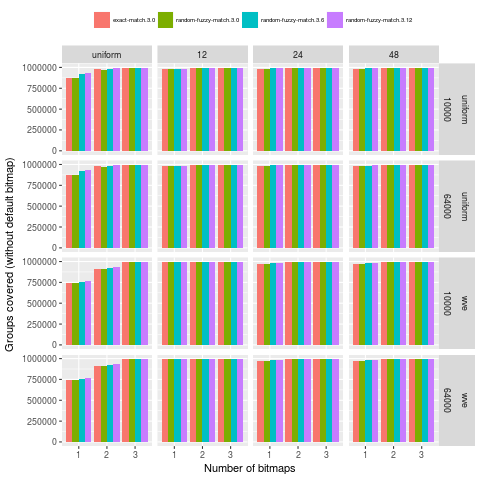

In [11]:
%%R -i groupsCoveredWithBitmapsOnlyForPods
ggplot(groupsCoveredWithBitmapsOnlyForPods) +
   geom_bar(aes(y=groupsCoveredWithoutDefaultBitmap, x=factor(podsNumBitmaps), 
                fill=interaction(podsAlgorithm, podsNumNodesPerBitmap, podsRedundancyPerBitmap)),
            stat="identity",position=position_dodge()) +
   facet_grid(groupSizeDist * podsNumRules ~ factor(placementNumHostsPerLeaf, levels=c('uniform','12','24','48'))) +
   xlab("Number of bitmaps") +
   ylab("Groups covered (without default bitmap)") +
   plotTheme

In [12]:
ruleCountForPods = DataSetAsDataFrame('rule_count_for_pods.csv', 
                                      folders, ['numRules'])

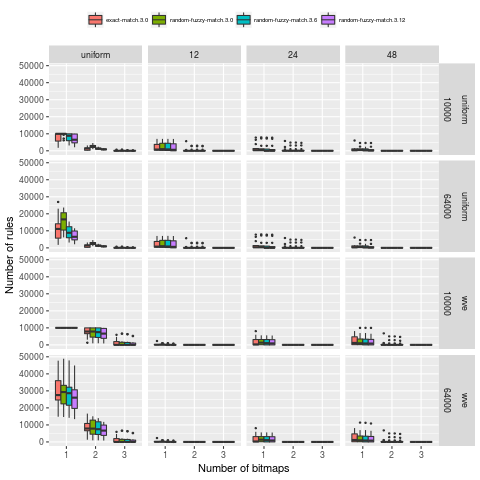

In [13]:
%%R -i ruleCountForPods
ggplot(ruleCountForPods) +
    geom_boxplot(aes(y=numRules, x=factor(podsNumBitmaps), 
                     fill=interaction(podsAlgorithm, podsNumNodesPerBitmap, podsRedundancyPerBitmap)),
                 outlier.size=0.5) +
    facet_grid(groupSizeDist * podsNumRules ~ factor(placementNumHostsPerLeaf, levels=c('uniform','12','24','48'))) +
    xlab("Number of bitmaps") +
    ylab("Number of rules") +
    plotTheme

In [14]:
trafficOverheadPerGroupPerTenantForPods = DataSetAsDataFrame(
    'traffic_overhead_per_group_per_tenant_for_pods.csv', folders, ['trafficOverhead'])

In [17]:
trafficOverheadPerGroupPerTenantForPods.head(2)

,trafficOverhead,groupSizeDist,placementDist,placementNumHostsPerLeaf,seed,podsAlgorithm,podsNumBitmaps,podsNumNodesPerBitmap,podsRedundancyPerBitmap,podsNumRules
0,0.0,uniform,colocate-uniform,uniform,0,exact-match,1,3,0,10000
1,0.0,uniform,colocate-uniform,uniform,0,exact-match,1,3,0,10000


In [19]:
# %%R -i trafficOverheadPerGroupPerTenantForPods
# ggplot(trafficOverheadPerGroupPerTenantForPods) +
#     geom_boxplot(aes(y=trafficOverhead, x=factor(podsNumBitmaps), 
#                      fill=interaction(podsAlgorithm, podsNumNodesPerBitmap, podsRedundancyPerBitmap))) +
#     facet_grid(groupSizeDist * podsNumRules ~ factor(placementNumHostsPerLeaf, levels=c('uniform','12','24','48'))) +
#     xlab("Number of bitmaps") +
#     ylab("Traffic overhead per group") +
#     plotTheme

In [31]:
overhead = trafficOverheadPerGroupPerTenantForPods.groupby(
    ['groupSizeDist', 'placementDist', 'placementNumHostsPerLeaf', 'seed',
     'podsAlgorithm', 'podsNumBitmaps', 'podsNumNodesPerBitmap', 'podsRedundancyPerBitmap',
    'podsNumRules']).mean()

In [33]:
overhead = overhead.reset_index()

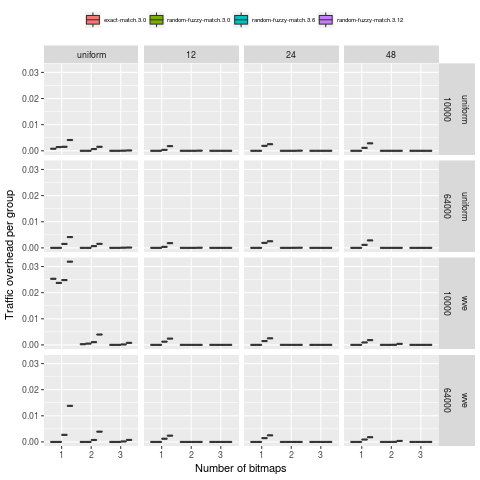

In [34]:
%%R -i overhead
ggplot(overhead) +
    geom_boxplot(aes(y=trafficOverhead, x=factor(podsNumBitmaps), 
                     fill=interaction(podsAlgorithm, podsNumNodesPerBitmap, podsRedundancyPerBitmap))) +
    facet_grid(groupSizeDist * podsNumRules ~ factor(placementNumHostsPerLeaf, levels=c('uniform','12','24','48'))) +
    xlab("Number of bitmaps") +
    ylab("Traffic overhead per group") +
    plotTheme

In [8]:
ruleCountPerLeaf = DataSetAsDataFrame('rule_count_per_leaf.csv', 
                                      folders, ['leafId', 'numRules'])

FileNotFoundError: File b'/mnt/sdb1/baseerat/numerical-evals/12-11-2017/logs-1M/logs.12_48_48_20_3000_10_5000_expon_1000000_5_uniform_colocate-uniform_-1_True_5_0.exact-match_1_3_0_10000_2_3_pods/rule_count_per_leaf.csv' does not exist

In [9]:
ruleCountPerLeaf.head(2)

,leafId,numRules,groupSizeDist,placementDist,colocateNumHostsPerLeaf,seed,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap,numRulesPerLeaf
0,0,10000,uniform,colocate-random-random,12,0,exact-match,10,3,0,10000
1,1,10000,uniform,colocate-random-random,12,0,exact-match,10,3,0,10000


In [10]:
plotRuleCountPerLeaf = ruleCountPerLeaf[ruleCountPerLeaf['numRulesPerLeaf'] != 32000]

In [12]:
plotRuleCountPerLeaf.to_csv(directory + 'rule_count_per_leaf.csv', index=False)

In [11]:
# %%R -i plotRuleCountPerLeaf
# plt <- ggplot(plotRuleCountPerLeaf) +
#    geom_boxplot(aes(y=numRules, x=factor(numBitmaps), 
#                     fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap)),
#                 outlier.size=0.5) +
#    facet_grid(groupSizeDist * numRulesPerLeaf ~ colocateNumHostsPerLeaf) +
#    xlab("Number of bitmaps") +
#    ylab("Number of rules") +
#    plotTheme
# ggsave(plt, file="rule_count_per_leaf.pdf", height=5, width=7)

In [19]:
groupCountPerTenant = DataSetAsDataFrame('group_count_per_tenant.csv', 
                                         folders, ['tenantId', 'groupCount'])

In [22]:
groupCountPerTenant.head(2)

,tenantId,groupCount,groupSizeDist,placementDist,colocateNumHostsPerLeaf,seed,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap,numRulesPerLeaf
0,0,341,uniform,colocate-random-random,12,0,exact-match,10,3,0,10000
1,1,85,uniform,colocate-random-random,12,0,exact-match,10,3,0,10000


In [27]:
# groupCountPerTenant[
#     (groupCountPerTenant['algorithm'] == 'exact-match') &
#     (groupCountPerTenant['groupSizeDist'] == 'wve') &
#     (groupCountPerTenant['colocateNumHostsPerLeaf'] == '48') & 
#     (groupCountPerTenant['numBitmaps'] == 10) & 
#     (groupCountPerTenant['numLeafsPerBitmap'] == 3) &
#     (groupCountPerTenant['numRulesPerLeaf'] == 10000)
# ]['groupCount'].quantile([0.0, 0.5, 0.99, 0.999, 0.9999, 1.0])
groupCountPerTenant[
    (groupCountPerTenant['algorithm'] == 'exact-match') &
    (groupCountPerTenant['groupSizeDist'] == 'wve') &
    (groupCountPerTenant['colocateNumHostsPerLeaf'] == '48') & 
    (groupCountPerTenant['numBitmaps'] == 10) & 
    (groupCountPerTenant['numLeafsPerBitmap'] == 3) &
    (groupCountPerTenant['numRulesPerLeaf'] == 10000)
]['groupCount'].describe()

count    3000.000000
mean      332.833333
std       802.921490
min        18.000000
25%        85.000000
50%       179.000000
75%       337.000000
max      9272.000000
Name: groupCount, dtype: float64

In [28]:
vmCountPerTenant = DataSetAsDataFrame('vm_count_per_tenant.csv', 
                                      folders, 
                                      ['tenantId', 'vmCount'])

In [19]:
vmCountPerTenant.head(2)

,tenantId,vmCount,groupSizeDist,placementDist,colocateNumHostsPerLeaf,seed,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap,numRulesPerLeaf
0,0,184,uniform,colocate-random-random,12,0,exact-match,10,1,0,10000
1,1,46,uniform,colocate-random-random,12,0,exact-match,10,1,0,10000


In [32]:
# vmCountPerTenant[
#     (vmCountPerTenant['algorithm'] == 'exact-match') & 
#     (vmCountPerTenant['groupSizeDist'] == 'wve') & 
#     (vmCountPerTenant['colocateNumHostsPerLeaf'] == '24') & 
#     (vmCountPerTenant['numBitmaps'] == 10) & 
#     (vmCountPerTenant['numLeafsPerBitmap'] == 3) &
#     (vmCountPerTenant['numRulesPerLeaf'] == 10000)
# ]['vmCount'].quantile([0.0, 0.5, 0.99, 0.999, 0.9999, 1.0])
vmCountPerTenant[
    (vmCountPerTenant['algorithm'] == 'exact-match') & 
    (vmCountPerTenant['groupSizeDist'] == 'wve') & 
    (vmCountPerTenant['colocateNumHostsPerLeaf'] == '24') & 
    (vmCountPerTenant['numBitmaps'] == 10) & 
    (vmCountPerTenant['numLeafsPerBitmap'] == 3) &
    (vmCountPerTenant['numRulesPerLeaf'] == 10000)
]['vmCount'].describe()

count    3000.000000
mean      179.701000
std       432.859193
min        10.000000
25%        46.000000
50%        97.000000
75%       182.000000
max      4999.000000
Name: vmCount, dtype: float64

In [8]:
groupSizePerGroupPerTenant = DataSetAsDataFrame('group_size_per_group_per_tenant.csv', 
                                                folders, ['groupId', 'groupSize'])

In [12]:
groupSizePerGroupPerTenant.head(2)

,groupId,groupSize,groupSizeDist,placementDist,colocateNumHostsPerLeaf,seed,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap,numRulesPerLeaf
0,0,103,uniform,colocate-random-random,12,0,exact-match,10,3,0,10000
1,1,107,uniform,colocate-random-random,12,0,exact-match,10,3,0,10000


In [10]:
groupSizePerGroupPerTenant[
    (groupSizePerGroupPerTenant['algorithm'] == 'exact-match') &
    (groupSizePerGroupPerTenant['colocateNumHostsPerLeaf'] == '24') & 
    (groupSizePerGroupPerTenant['numBitmaps'] == 10) & 
    (groupSizePerGroupPerTenant['numLeafsPerBitmap'] == 3) &
    (groupSizePerGroupPerTenant['numRulesPerLeaf'] == 10000)
].groupby('groupSizeDist')['groupSize'].quantile(
    [0.0, 0.5, 0.8, 0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.999, 0.9999, 1.0])

groupSizeDist        
uniform        0.0000       5.000
               0.5000     141.000
               0.8000     977.000
               0.9900    4291.000
               0.9910    4346.000
               0.9920    4400.000
               0.9930    4458.000
               0.9940    4512.000
               0.9950    4566.000
               0.9960    4621.000
               0.9990    4834.000
               0.9999    4972.000
               1.0000    4999.000
wve            0.0000       5.000
               0.5000      12.000
               0.8000      61.000
               0.9900     390.000
               0.9910     417.000
               0.9920     457.000
               0.9930     520.000
               0.9940     694.000
               0.9950    2395.505
               0.9960    3146.000
               0.9990    4742.000
               0.9999    4962.000
               1.0000    4998.000
Name: groupSize, dtype: float64

In [11]:
plotGroupSizePerGroupPerTenant = groupSizePerGroupPerTenant[
    (groupSizePerGroupPerTenant['algorithm'] == 'exact-match') &
    (groupSizePerGroupPerTenant['colocateNumHostsPerLeaf'] == '24') & 
    (groupSizePerGroupPerTenant['numBitmaps'] == 10) & 
    (groupSizePerGroupPerTenant['numLeafsPerBitmap'] == 3) &
    (groupSizePerGroupPerTenant['numRulesPerLeaf'] == 10000)]

In [13]:
plotGroupSizePerGroupPerTenant.to_csv(directory + 'group_size_per_group_per_tenant.csv', index=False)

In [9]:
groupsCoveredWithBitmapsOnly = DataSetAsDataFrame('groups_covered_with_bitmaps_only.csv', 
                                                  folders, 
                                                  ['index', 'groupsCovered', 'groupsCoveredWithoutDefaultBitmap'],
                                                  header=0)

In [10]:
plotGroupsCoveredWithBitmapsOnly = groupsCoveredWithBitmapsOnly[
    groupsCoveredWithBitmapsOnly['numRulesPerLeaf'] != 32000]

In [11]:
plotGroupsCoveredWithBitmapsOnly.to_csv(directory + 'groups_covered_with_bitmaps_only.csv', index=False)

In [ ]:
# %%R -i plotGroupsCoveredWithBitmapsOnly
# plt <- ggplot(plotGroupsCoveredWithBitmapsOnly) +
#    geom_bar(aes(y=groupsCoveredWithoutDefaultBitmap, x=factor(numBitmaps), 
#                 fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap)),
#             stat="identity",position=position_dodge()) +
#    facet_grid(groupSizeDist * numRulesPerLeaf ~ colocateNumHostsPerLeaf) +
#    xlab("Number of bitmaps") +
#    ylab("Groups covered (without default bitmap)") +
#    plotTheme
# ggsave(plt, file="groups_covered_with_bitmaps_only.pdf")

In [30]:
# trafficOverhead = DataSetAsDataFrame('traffic_overhead.csv', 
#                                      folders, 
#                                      ['index', 'trafficOverhead'])

In [9]:
# %%R -i trafficOverhead
# ggplot(trafficOverhead) +
#    geom_bar(aes(y=trafficOverhead, x=factor(numBitmaps), 
#                 fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap)),
#             stat="identity",position=position_dodge()) +
#    facet_grid(groupSizeDist * numRulesPerLeaf ~ colocateNumHostsPerLeaf) +
#    xlab("Number of bitmaps") +
#    ylab("Traffic Overhead") +
#    plotTheme

In [8]:
leafSpineTraffic = DataSetAsDataFrame('leaf_spine_traffic_per_group_per_tenant.csv', 
                                      folders, 
                                      ['groupId', 'multicastTraffic', 'unicastTraffic', 'overlayTraffic',
                                       'baseeratTraffic'],
                                       header=0)

In [9]:
leafSpineTraffic.head(2)

,groupId,multicastTraffic,unicastTraffic,overlayTraffic,baseeratTraffic,groupSizeDist,placementDist,colocateNumHostsPerLeaf,seed,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap,numRulesPerLeaf
0,0,121,412,238,121,uniform,colocate-random-random,12,0,exact-match,10,3,0,10000
1,1,125,428,246,125,uniform,colocate-random-random,12,0,exact-match,10,3,0,10000


In [10]:
# leafSpineTraffic.to_csv(directory + 'leaf_spine_traffic_per_group_per_tenant.csv', index=False)

In [11]:
leafSpineOverhead = leafSpineTraffic.groupby([
    'groupSizeDist', 'placementDist', 'colocateNumHostsPerLeaf', 'algorithm', 'numBitmaps', 'numLeafsPerBitmap', 
    'redundancyPerBitmap', 'numRulesPerLeaf', 'seed'])[
    ['unicastTraffic', 'multicastTraffic', 'baseeratTraffic', 'overlayTraffic']].agg('sum')
leafSpineOverhead.reset_index(inplace=True)

In [12]:
leafSpineOverhead.head(2)

,groupSizeDist,placementDist,colocateNumHostsPerLeaf,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap,numRulesPerLeaf,seed,unicastTraffic,multicastTraffic,baseeratTraffic,overlayTraffic
0,uniform,colocate-random-random,12,exact-match,10,3,0,10000,0,2345430212,664912636,3022179814,1325831272
1,uniform,colocate-random-random,12,exact-match,10,3,0,32000,0,2345430212,664912636,2524882904,1325831272


In [15]:
plotLeafSpineOverhead = leafSpineOverhead[leafSpineOverhead['numRulesPerLeaf'] != 32000]

In [16]:
plotLeafSpineOverhead.to_csv(directory + 'leaf_spine_overhead_per_group_per_tenant.csv', index=False)